In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [95]:
sns.set(style="whitegrid")
%matplotlib inline

In [9]:
Bank_data = pd.read_csv('Bank_Churn.csv')
Bank_data.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
Bank_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
Bank_data.shape

(10000, 13)

In [15]:
Bank_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# Apply one-hot encoding to 'Geography' and 'Gender'
df_encoded = pd.get_dummies(Bank_data, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


In [19]:
# View the transformed dataset
df_encoded.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# EDA and Visualization

C:\Users\Daniel\AppData\Local\Temp\ipykernel_36148\1752962114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=Bank_data, palette='Set2')


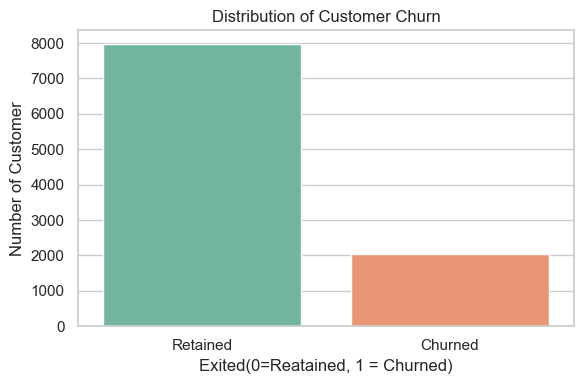

In [97]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=Bank_data, palette='Set2')
plt.title('Distribution of Customer Churn')
plt.xlabel('Exited(0=Reatained, 1 = Churned)')
plt.ylabel('Number of Customer')
plt.xticks([0,1], ['Retained', 'Churned'])
plt.tight_layout()

In [26]:
# Print value counts and percentage

churn_counts = Bank_data['Exited'].value_counts()
churn_percent = Bank_data['Exited'].value_counts(normalize=True) * 100
print('Churn Distribution:\n', churn_counts)
print('\nPercentage:\n', churn_percent.round(2))

Churn Distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64

Percentage:
 Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


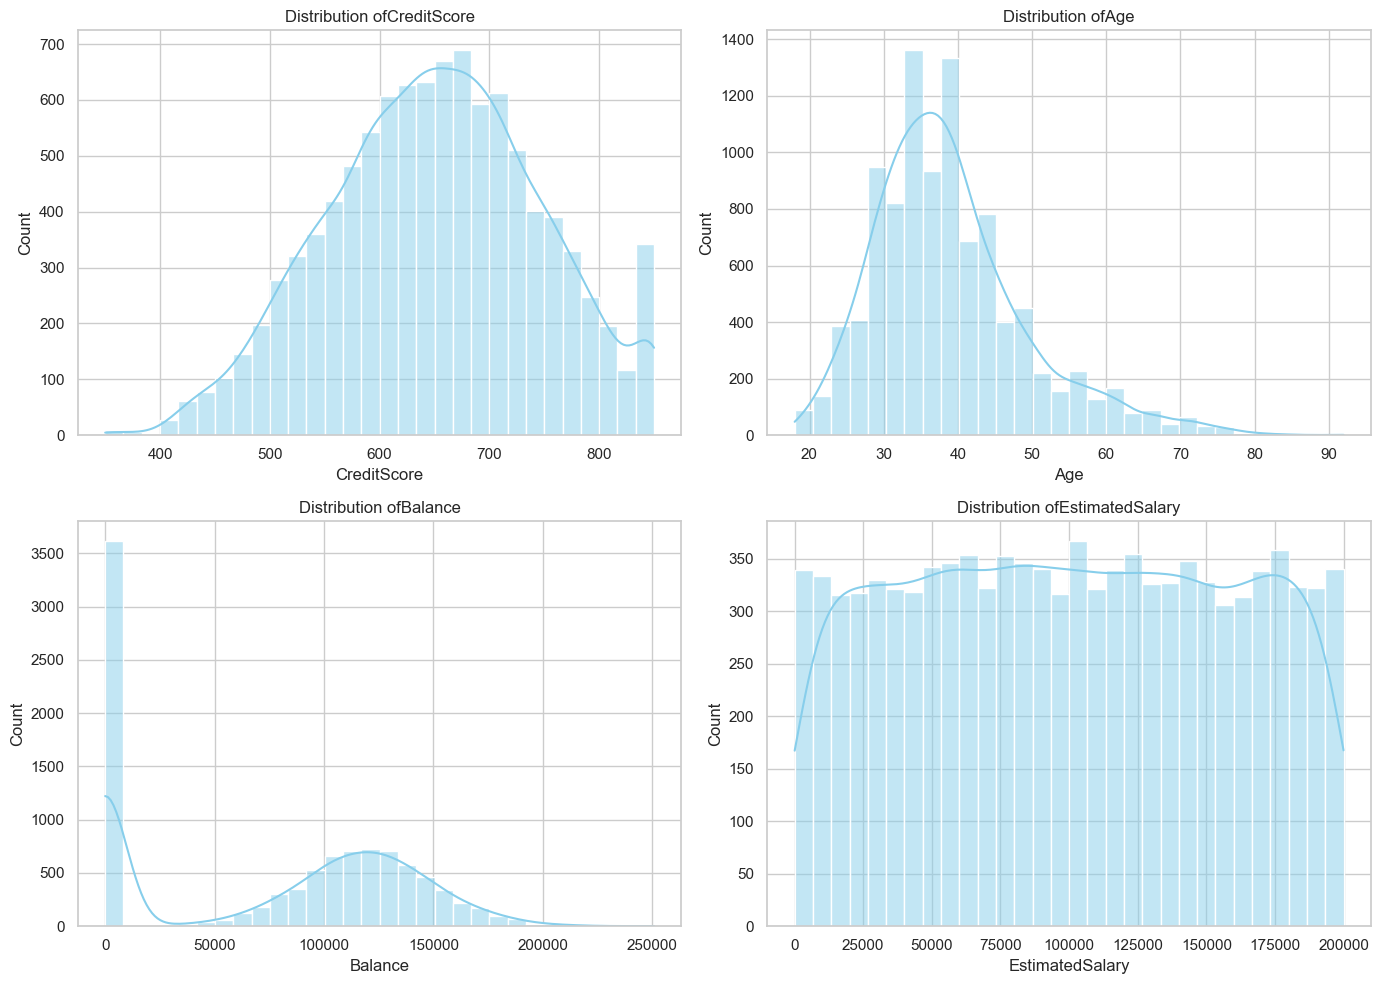

In [99]:
num_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2,2,i)
    sns.histplot(Bank_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of{col}')
plt.tight_layout()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_36148\3392220614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Bank_data, x=col, palette='Set2')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_36148\3392220614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Bank_data, x=col, palette='Set2')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_36148\3392220614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Bank_data, x=col, palette='Set2')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_36148\3392220614.py:9: FutureWarning:

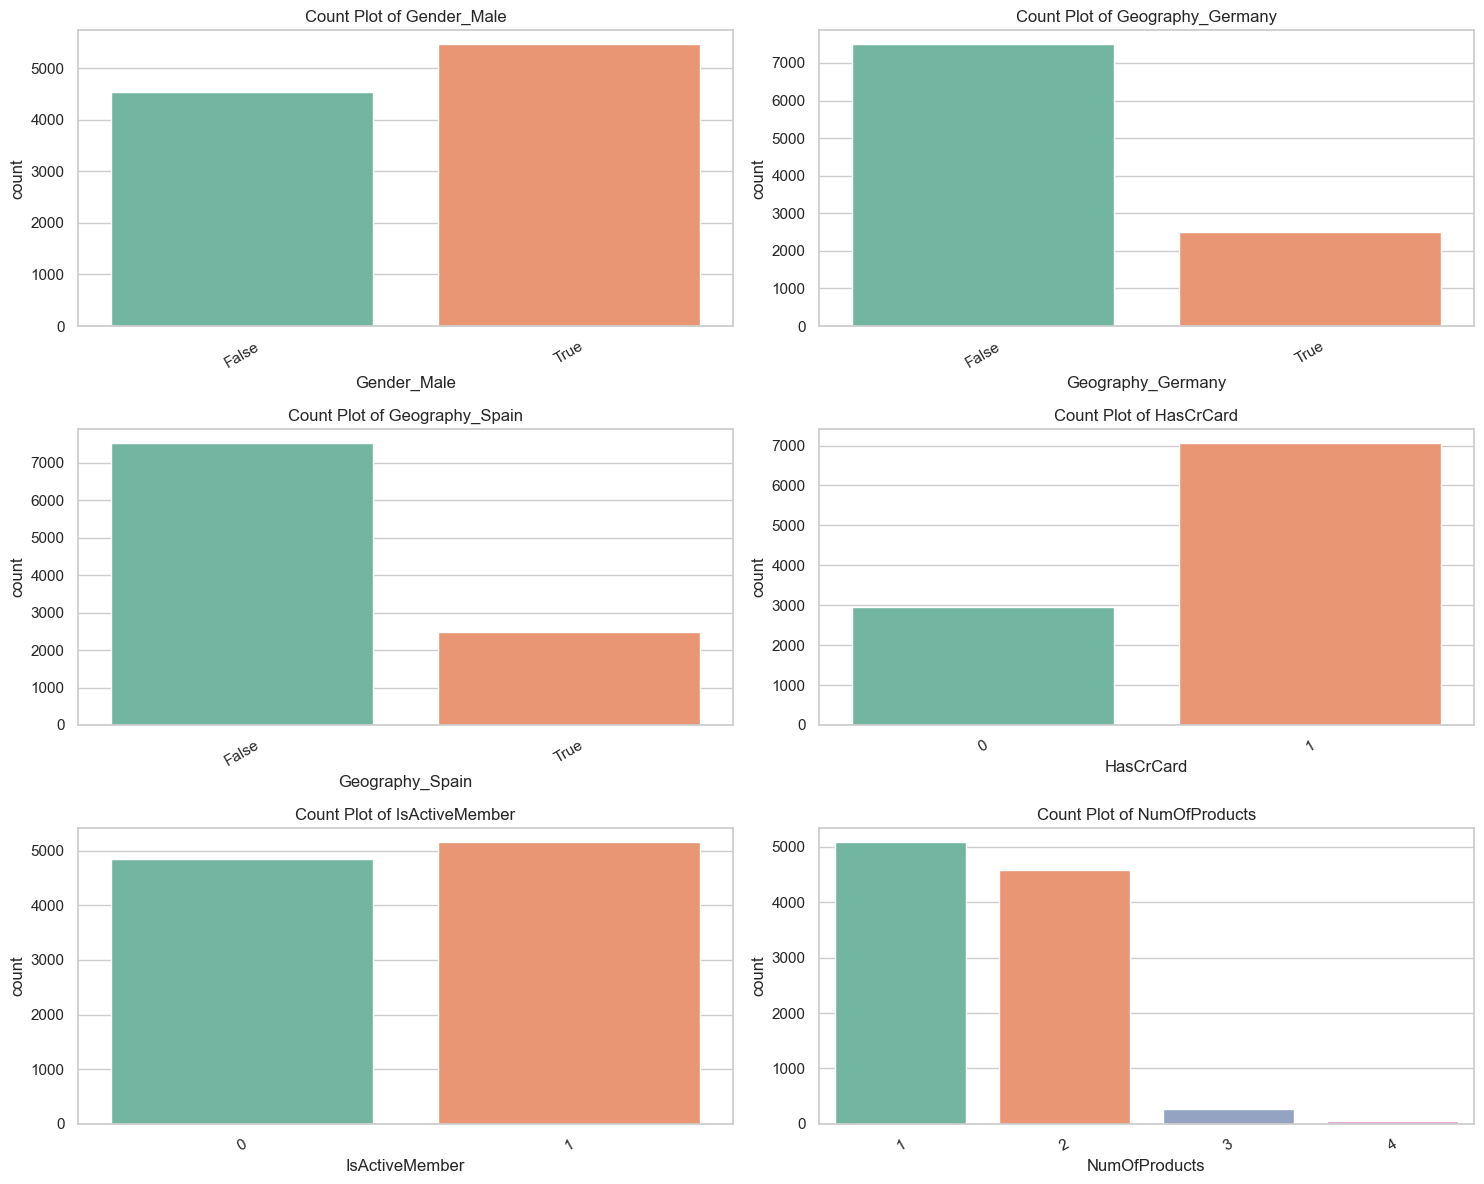

In [105]:
# Categorical features to plot
cat_features = ['Gender_Male', 'Geography_Germany', 'Geography_Spain', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

# Create subplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=Bank_data, x=col, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=30)

plt.tight_layout()

In [32]:

# Create Age Group buckets
Bank_data['AgeGroup'] = pd.cut(Bank_data['Age'], bins=[0, 30, 45, 60, np.inf], labels=['18-30', '31-45', '46-60', '60+'])

# Create Balance Buckets
Bank_data['BalanceBucket'] = pd.cut(Bank_data['Balance'], bins=[-1, 1, 50000, 100000, np.inf], labels=['0', 'Low', 'Medium', 'High'])

# Create a helper function to calculate churn rate by category
def churn_rate_by_category(col):
    return Bank_data.groupby(col)['Exited'].agg(['count', 'sum', 'mean']).rename(
        columns={'count': 'Total Customers', 'sum': 'Churned Customers', 'mean': 'Churn Rate'})

# Churn rate by various dimensions
churn_by_age_group = churn_rate_by_category('AgeGroup')
churn_by_balance = churn_rate_by_category('BalanceBucket')
churn_by_num_products = churn_rate_by_category('NumOfProducts')
churn_by_active = churn_rate_by_category('IsActiveMember')
churn_by_creditcard = churn_rate_by_category('HasCrCard')
churn_by_geography = churn_rate_by_category('Geography')

# Display all churn breakdowns
{
    "Churn by Age Group": churn_by_age_group,
    "Churn by Balance Bucket": churn_by_balance,
    "Churn by Number of Products": churn_by_num_products,
    "Churn by Active Membership": churn_by_active,
    "Churn by Credit Card Holding": churn_by_creditcard,
    "Churn by Geography": churn_by_geography
}


C:\Users\Daniel\AppData\Local\Temp\ipykernel_36148\1596583927.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return Bank_data.groupby(col)['Exited'].agg(['count', 'sum', 'mean']).rename(


{'Churn by Age Group':           Total Customers  Churned Customers  Churn Rate
 AgeGroup                                                
 18-30                1968                148    0.075203
 31-45                5921                932    0.157406
 46-60                1647                842    0.511233
 60+                   464                115    0.247845,
 'Churn by Balance Bucket':                Total Customers  Churned Customers  Churn Rate
 BalanceBucket                                                
 0                         3617                500    0.138236
 Low                         75                 26    0.346667
 Medium                    1509                300    0.198807
 High                      4799               1211    0.252344,
 'Churn by Number of Products':                Total Customers  Churned Customers  Churn Rate
 NumOfProducts                                                
 1                         5084               1409    0.277144
 2 

# model training

*Drop unnecessary columns (like CustomerId, Surname)*

*Convert categorical variables (Geography, Gender) using one-hot encoding*

In [36]:
Bank_data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
Bank_data = pd.get_dummies(Bank_data, drop_first=True)

*Define Features and Target*

In [39]:
X = Bank_data.drop('Exited', axis=1)
y = Bank_data['Exited']

*Train-Test Split*

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Scale Features*

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Train Model*

In [48]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8385
[[1550   57]
 [ 266  127]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1607
           1       0.69      0.32      0.44       393

    accuracy                           0.84      2000
   macro avg       0.77      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000



*Model Performance Summary*
*Overall Accuracy: 83.85% — the model correctly predicted 84% of customers overall.*

*Precision for Churned Customers (class 1): 69% — when the model predicts a customer will churn, it's correct 69% of the time.*

*Recall for Churned Customers (class 1): 32% — the model identifies only 32% of the customers who actually churn.*

*F1-score for Churned Customers: 44% — balance between precision and recall for churned class.*

*Key Insight*

*While your model is good at identifying non-churners (class 0), it's underperforming for actual churners (class 1) — missing many of them. This is common in imbalanced datasets.*

**XGBoost is a powerful, gradient-boosting-based model well-suited for imbalanced classification problems like churn prediction.**

Train and Evaluate using ***XGBoost Classifier***

In [57]:
model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    use_label_encoder=False,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42
)

*Train the model*

In [59]:
model.fit(X_train, y_train)

C:\Users\Daniel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:28:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

*Predict*

In [63]:
y_pred = model.predict(X_test)

*Evaluate*

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8265
Confusion Matrix:
 [[1403  204]
 [ 143  250]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.64      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000



***Model Performance Overview***

*Accuracy: 82.65%*
*This means the model correctly predicted churn or retention in ~83% of test cases — solid for a business context.*
 
 *Confusion Matrix:Predicted*
         *0*     *1*
         
*Actual*

*0*     *1403*   *204*

*1*      *143*   *250*

*True Positives (250): Correctly predicted churns.*

*False Negatives (143): Missed churners — important to reduce.*

*False Positives (204): Predicted churners who didn’t churn.*

*Class Metrics:*

*Precision (churned/1): 55% → Among predicted churners, only 55% actually churned.*

*Recall (churned/1): 64% → The model caught 64% of all churners.*

*F1-score (churned/1): 59% → Balanced view of precision & recall.*

*What This Tells Us*

*The model performs better than chance and balances the trade-off between identifying churners and avoiding false alarms.*

*Still, churn prediction (class 1) is harder due to class imbalance and subtler patterns.*



***SMOTE for synthetic oversampling of churned customers.***

*Train Test Split*

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

*Apply SMOTE*

In [74]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

*Train model on balanced data*

In [76]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

*Predictions and Evaluate*

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, output_dict=True))

Accuracy: 0.8435
Confusion Matrix:
 [[1448  145]
 [ 168  239]]

Classification Report:
 {'0': {'precision': 0.8960396039603961, 'recall': 0.9089767733835531, 'f1-score': 0.9024618261140542, 'support': 1593.0}, '1': {'precision': 0.6223958333333334, 'recall': 0.5872235872235873, 'f1-score': 0.6042983565107459, 'support': 407.0}, 'accuracy': 0.8435, 'macro avg': {'precision': 0.7592177186468647, 'recall': 0.7481001803035702, 'f1-score': 0.7533800913124, 'support': 2000.0}, 'weighted avg': {'precision': 0.8403530966377888, 'recall': 0.8435, 'f1-score': 0.841785560049781, 'support': 2000.0}}


In [93]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

accuracy, conf_matrix, class_report

(0.8435,
 array([[1448,  145],
        [ 168,  239]], dtype=int64),
 {'0': {'precision': 0.8960396039603961,
   'recall': 0.9089767733835531,
   'f1-score': 0.9024618261140542,
   'support': 1593.0},
  '1': {'precision': 0.6223958333333334,
   'recall': 0.5872235872235873,
   'f1-score': 0.6042983565107459,
   'support': 407.0},
  'accuracy': 0.8435,
  'macro avg': {'precision': 0.7592177186468647,
   'recall': 0.7481001803035702,
   'f1-score': 0.7533800913124,
   'support': 2000.0},
  'weighted avg': {'precision': 0.8403530966377888,
   'recall': 0.8435,
   'f1-score': 0.841785560049781,
   'support': 2000.0}})

*Model Performance After SMOTE (XGBoost Classifier)*

*Accuracy: 84.35%*

*Precision (Churn): 62.24%*

*Recall (Churn): 58.72%*

*F1-score (Churn): 60.43%*

*Precision (Non-Churn): 89.60%*

*Recall (Non-Churn): 90.90%*

*F1-score (Non-Churn): 90.25%*

*Macro Avg F1-score: 75.34%*

*Interpretation:*
              
*The model's ability to correctly identify churned customers has improved significantly after applying SMOTE.*

*While there's still some trade-off between precision and recall for churners, the overall performance (especially F1) indicates the model is now more balanced and fair across both classes.*

*SMOTE has reduced the class imbalance impact and boosted generalization, especially for the minority (churned) class.*

